In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from wordcloud import WordCloud

In [2]:
# Cargamos el df
BW_df = pd.read_csv('./Opiniones_trip.csv', encoding = "utf8")
BW_df

,calificacion,fecha,nombre,opinion
0,ui_bubble_rating bubble_30,septiembre de 2019,viajera029,El hostal está detrás de la Catedral y tiene 2...
1,ui_bubble_rating bubble_10,agosto de 2019,Maite M,"El hotel huele horrible a caño, los baños suci..."
2,ui_bubble_rating bubble_40,febrero de 2019,Denise C,"Es la tercera vez que me hospedo, las habitaci..."
3,ui_bubble_rating bubble_40,junio de 2019,MoonkyPlata,La ubicación es de lo mejor! A poca distancia ...
4,ui_bubble_rating bubble_30,abril de 2019,Kathe D,"El lugar queda en una muy buena ubicación, al ..."
...,...,...,...,...
399,ui_bubble_rating bubble_40,abril de 2014,Melisa P,Estuve alojada la primer semana de Abril duran...
400,ui_bubble_rating bubble_40,febrero de 2014,KARINA R,El mejor hostel en el cual me hospedé durante ...
401,ui_bubble_rating bubble_50,marzo de 2014,Sayra Joanna S,Estuve el fin de semana pasado hospedada aquí ...
402,ui_bubble_rating bubble_30,octubre de 2013,Cecita_d,"El hostel es bastante gradable, las habitacion..."


In [3]:
# Vemos la información del dataset
BW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   calificacion  404 non-null    object
 1   fecha         404 non-null    object
 2   nombre        404 non-null    object
 3   opinion       404 non-null    object
dtypes: object(4)
memory usage: 12.8+ KB


In [4]:
# Buscamos los 3  datos faltantes
BW_df[BW_df["fecha"].isna()]

,calificacion,fecha,nombre,opinion


In [5]:
# Rellenamos con los datos más proximo superior (ffill), podríamos tambien hacerlo con el dato más próximo inferior (backfill)
BW_df.fillna(method = "ffill", inplace = True)

In [6]:
# Verificamos que ya no haya valores nulos
BW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   calificacion  404 non-null    object
 1   fecha         404 non-null    object
 2   nombre        404 non-null    object
 3   opinion       404 non-null    object
dtypes: object(4)
memory usage: 12.8+ KB


In [7]:
# Empezamos a tranformar los datos necesarios
BW_df.head(5)

,calificacion,fecha,nombre,opinion
0,ui_bubble_rating bubble_30,septiembre de 2019,viajera029,El hostal está detrás de la Catedral y tiene 2...
1,ui_bubble_rating bubble_10,agosto de 2019,Maite M,"El hotel huele horrible a caño, los baños suci..."
2,ui_bubble_rating bubble_40,febrero de 2019,Denise C,"Es la tercera vez que me hospedo, las habitaci..."
3,ui_bubble_rating bubble_40,junio de 2019,MoonkyPlata,La ubicación es de lo mejor! A poca distancia ...
4,ui_bubble_rating bubble_30,abril de 2019,Kathe D,"El lugar queda en una muy buena ubicación, al ..."


In [8]:
# Tranformemos la calificación a un número únicamente qie es el penúltimo de la cadena
for i, cali in enumerate(BW_df['calificacion']):
    new_cal = cali[-2:-1]
    BW_df['calificacion'][i] = int(new_cal)

In [9]:
BW_df["calificacion"] = BW_df["calificacion"].astype(int)

In [10]:
meses = {"enero": 1, "febrero": 2, "marzo": 3, "abril": 4, "mayo": 5, "junio": 6, "julio": 7, "agosto": 8, "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12}

In [11]:
# Transformamos la fecha a mes y año
mes = []
año = []
for i, fecha in enumerate(BW_df["fecha"]):
    m = fecha.split()[0]
    a = int(fecha.split()[-1])
    
    if m in meses.keys():
        m_numero = m.replace(m, str(meses.get(m)))
    mes.append(int(m_numero))
    año.append(a)

BW_df["mes"] = mes
BW_df["año"] = año

In [12]:
# Eliminamo la fecha ya que tenemos el mes y año en otars columnas
BW_df.drop('fecha', axis = 1, inplace = True)

In [13]:
# Volvemos a ver los datos para ver como quedarón
BW_df.head(8)

,calificacion,nombre,opinion,mes,año
0,3,viajera029,El hostal está detrás de la Catedral y tiene 2...,9,2019
1,1,Maite M,"El hotel huele horrible a caño, los baños suci...",8,2019
2,4,Denise C,"Es la tercera vez que me hospedo, las habitaci...",2,2019
3,4,MoonkyPlata,La ubicación es de lo mejor! A poca distancia ...,6,2019
4,3,Kathe D,"El lugar queda en una muy buena ubicación, al ...",4,2019
5,4,missrach_walk,"El hostal está situado en una gran ubicación, ...",2,2012
6,5,geronimoturtle,Este hostal está situado en una fantástica ubi...,12,2011
7,3,Don Wright,Mundo joven Catedral está excelentemente ubica...,1,2012


In [14]:
# Concideraremos que las calificaciones mayores o iguales a 4 quiere decir que es un buen hotel (1) y menos a 4 malos (0)
retroalimentacion = []
for i in BW_df["calificacion"]:
    if i >= 4:
        retroalimentacion.append(1)
    else:
        retroalimentacion.append(0)
        
BW_df["retroalimentacion"] = retroalimentacion

In [15]:
# El nombre de los usuarios en ésta ocasión no nos será de mucha utilidad por lo que sería mejor eliminarla
BW_df.drop("nombre", axis = 1, inplace = True)

In [16]:
sns.set_style('whitegrid')

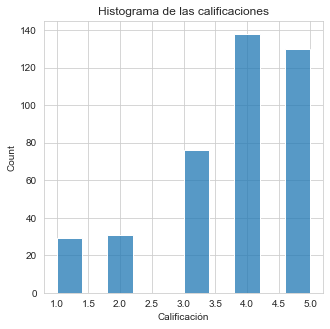

In [17]:
# Empezamos a hacer una representación gráfica de los datos que tenemos para intentar encontrar dtos interesantes
# Histograma de las calificaciones
plt.figure(figsize = (5,5))
sns.histplot(x = "calificacion", data = BW_df)
plt.title("Histograma de las calificaciones")
plt.xlabel("Calificación")
plt.show()

In [18]:
# Pocerntaje de calificación
TOTAL_OPINIONES = BW_df.shape[0]
for i in range(1,6):
    procentaje = BW_df[BW_df["calificacion"] == i].shape[0] / TOTAL_OPINIONES
    print("Porcentaje con calificación {} es {:.5f}%".format(i, procentaje*100))
    
print("Debe mejorar 33.65%")
print("Es bueno 66.35%")

Porcentaje con calificación 1 es 7.17822%
Porcentaje con calificación 2 es 7.67327%
Porcentaje con calificación 3 es 18.81188%
Porcentaje con calificación 4 es 34.15842%
Porcentaje con calificación 5 es 32.17822%
Debe mejorar 33.65%
Es bueno 66.35%


In [19]:
BW_df

,calificacion,opinion,mes,año,retroalimentacion
0,3,El hostal está detrás de la Catedral y tiene 2...,9,2019,0
1,1,"El hotel huele horrible a caño, los baños suci...",8,2019,0
2,4,"Es la tercera vez que me hospedo, las habitaci...",2,2019,1
3,4,La ubicación es de lo mejor! A poca distancia ...,6,2019,1
4,3,"El lugar queda en una muy buena ubicación, al ...",4,2019,0
...,...,...,...,...,...
399,4,Estuve alojada la primer semana de Abril duran...,4,2014,1
400,4,El mejor hostel en el cual me hospedé durante ...,2,2014,1
401,5,Estuve el fin de semana pasado hospedada aquí ...,3,2014,1
402,3,"El hostel es bastante gradable, las habitacion...",10,2013,0


In [20]:
# Eliminamos la calificación ya que tenemos ahora la retroalimentación para guiarnos
BW_df.drop("calificacion", axis = 1, inplace = True)

<AxesSubplot:>

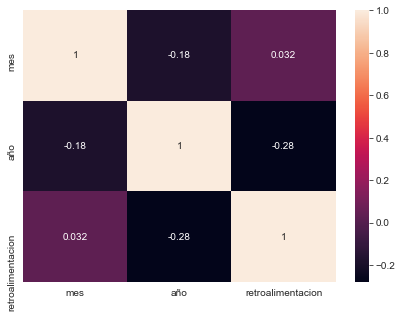

In [21]:
# Haremós un mpa de correlación para ver si hay alguna relación núemrica que aún no hayamos visto
corr = BW_df.corr()

plt.figure(figsize = (7,5))
sns.heatmap(corr, annot = True)

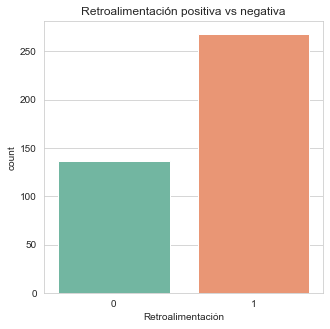

In [22]:
# Viendo de otra manera las críticas del hotel
plt.figure(figsize = (5,5))
sns.countplot(x = "retroalimentacion", data = BW_df, palette = "Set2")
plt.title("Retroalimentación positiva vs negativa")
plt.xlabel("Retroalimentación")
plt.show()

Text(0.5, 0, 'Año')

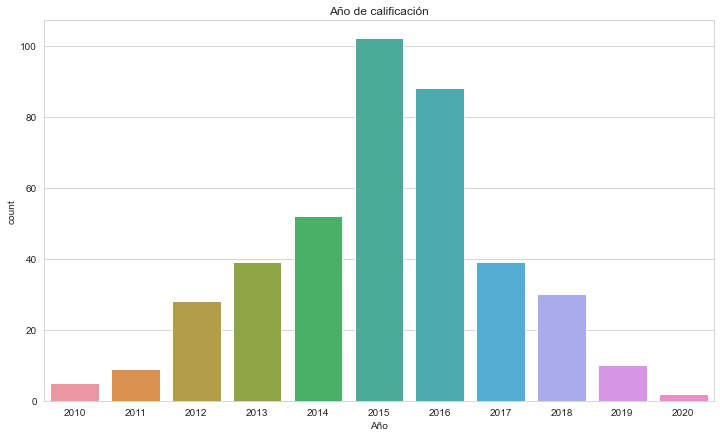

In [23]:
# ¿De que año son las criticas?
plt.figure(figsize = (12,7))
sns.countplot(x = "año", data =  BW_df)
plt.title("Año de calificación")
plt.xlabel("Año")

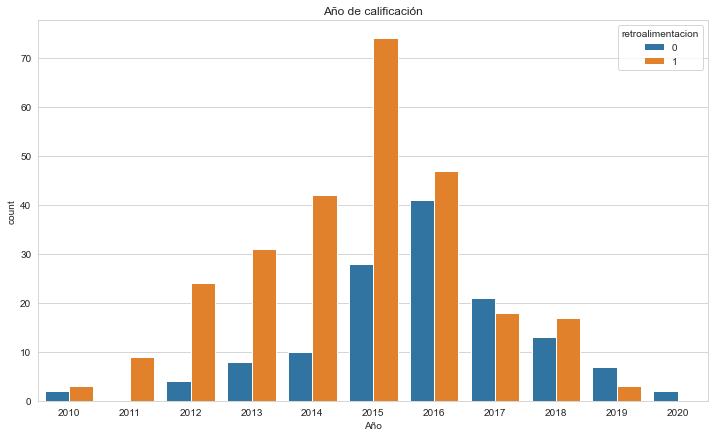

In [24]:
# ¿Hay una relevancia entre la retroalimentación y el año?
plt.figure(figsize = (12,7))
sns.countplot(x = "año", data =  BW_df, hue = "retroalimentacion")
plt.title("Año de calificación")
plt.xlabel("Año")
plt.show()

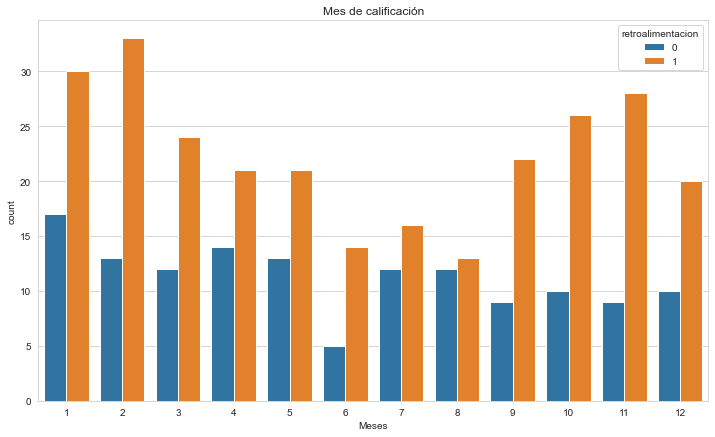

In [25]:
# ¿Hay una relación con los meses?
plt.figure(figsize = (12,7))
sns.countplot(x = "mes", data =  BW_df, hue = "retroalimentacion")
plt.title("Mes de calificación")
plt.xlabel("Meses")
plt.show()

Text(0.5, 1.0, 'Acumulación de las opiniones con respecto al año')

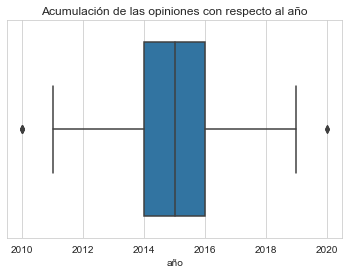

In [26]:
# Boxplot para ver en donde se acumulan las opiniones de los usuarios
sns.boxplot(x = "año", data = BW_df)
plt.title("Acumulación de las opiniones con respecto al año")

In [27]:
print("*****Porcentaje de opiniones por año*****")
TOTAL = BW_df.shape[0]
for i in range(6,10):
    año = (BW_df["año"] == (2000+i)).sum()
    print("\naño 200{} porcentaje de opiniones: {:.5F}% \nes un total de {}".format(i, (año/TOTAL)*100, año))
for i in range(10,22):
    año = (BW_df["año"] == (2000+i)).sum()
    print("\naño 20{} porcentaje de opiniones: {:.5F}% \nes un total de {}".format(i, (año/TOTAL)*100, año))   

*****Porcentaje de opiniones por año*****

año 2006 porcentaje de opiniones: 0.00000% 
es un total de 0

año 2007 porcentaje de opiniones: 0.00000% 
es un total de 0

año 2008 porcentaje de opiniones: 0.00000% 
es un total de 0

año 2009 porcentaje de opiniones: 0.00000% 
es un total de 0

año 2010 porcentaje de opiniones: 1.23762% 
es un total de 5

año 2011 porcentaje de opiniones: 2.22772% 
es un total de 9

año 2012 porcentaje de opiniones: 6.93069% 
es un total de 28

año 2013 porcentaje de opiniones: 9.65347% 
es un total de 39

año 2014 porcentaje de opiniones: 12.87129% 
es un total de 52

año 2015 porcentaje de opiniones: 25.24752% 
es un total de 102

año 2016 porcentaje de opiniones: 21.78218% 
es un total de 88

año 2017 porcentaje de opiniones: 9.65347% 
es un total de 39

año 2018 porcentaje de opiniones: 7.42574% 
es un total de 30

año 2019 porcentaje de opiniones: 2.47525% 
es un total de 10

año 2020 porcentaje de opiniones: 0.49505% 
es un total de 2

año 2021 porcen

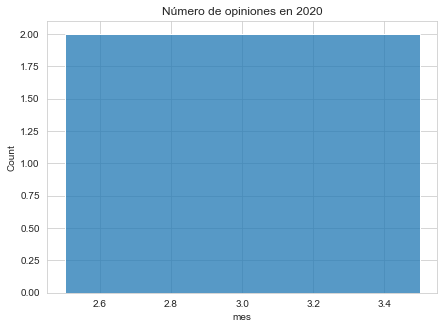

In [28]:
# Año critico 2020 pandemia
plt.figure(figsize = (7,5))
sns.histplot(x = "mes", data = BW_df[BW_df["año"] == 2020])
plt.title("Número de opiniones en 2020")
plt.show()

In [29]:
# Procesamiento de los datos
# Las opiniones: Serán removidas las stopwords, los signos y lo números
# STOPWORDS
nltk.download('stopwords')
STOPWORDS_SPANISH = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP-001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Agregamos una palabra que seguro se repetirá mucho y no es necesaria "Hotel" y "Hoteles"
STOPWORDS_SPANISH.append("hotel")
STOPWORDS_SPANISH.append("hoteles")
STOPWORDS_SPANISH.append("hostal")
STOPWORDS_SPANISH.append("hostel")
STOPWORDS_SPANISH.append("habitación")
STOPWORDS_SPANISH.append("habitaciones")

In [31]:
# CARACTERES ESPECIALES
signos = list(string.punctuation)

In [32]:
# NUMEROS
numeros = list(["0","1","2","3","4","5","6","7","8","9"])

In [33]:
opiniones = []
for phrase in BW_df["opinion"]:
    opinion = [word for word in phrase.split() if word.lower() not in STOPWORDS_SPANISH]
    opiniones.append(" ".join(opinion))

In [34]:
new_opiniones = []
for opinion in opiniones:
    sin_signos = [char for char in opinion if char not in signos]
    new_opiniones.append("".join(sin_signos))

In [35]:
clean_opinions = []
for opinion in new_opiniones:
    sin_num = [char for char in opinion if char not in numeros]
    clean_opinions.append("".join(sin_num))

In [36]:
# Sustituirimos la variable opinion con las nuevas
BW_df["opinion"] = clean_opinions

In [37]:
BW_df

,opinion,mes,año,retroalimentacion
0,detrás Catedral estaciones metro cerca camina...,9,2019,0
1,huele horrible caño baños sucios apestan lavan...,8,2019,0
2,tercera vez hospedo cómodas amplias baños tamb...,2,2019,1
3,ubicación mejor poca distancia estación metro ...,6,2019,1
4,lugar queda buena ubicación respaldo catedral ...,4,2019,0
...,...,...,...,...
399,alojada primer semana Abril noches atencion ...,4,2014,1
400,mejor hospedé meses recorrí México caro mex...,2,2014,1
401,fin semana pasado hospedada aquí grupo amigas ...,3,2014,1
402,bastante gradable estan limpias esteticamente ...,10,2013,0


In [38]:
# Sepraemos las opiniones buenas de las malas
buenas = ""
malas = ""
for i, cal in enumerate(BW_df["retroalimentacion"]):
    if cal == 1:
        buenas += BW_df["opinion"][i]
    else:
        malas += BW_df["opinion"][i]

In [39]:
wordcloud1 = WordCloud().generate(buenas)
wordcloud2 = WordCloud().generate(malas)

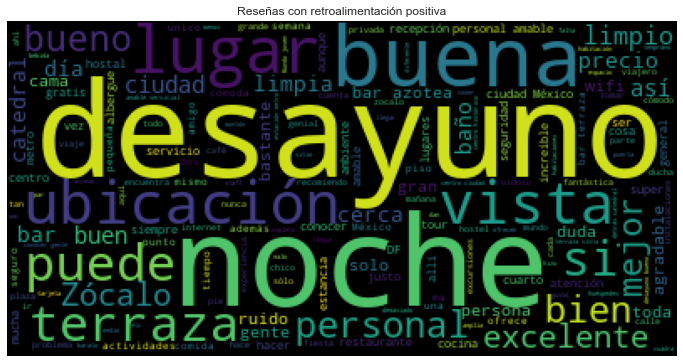

In [40]:
# Las palabras más usadas en la retroalimentación positiva
plt.figure(figsize = (12,12))
plt.imshow(wordcloud1)
plt.title("Reseñas con retroalimentación positiva")
plt.grid(False)
plt.axis(False)
plt.show()

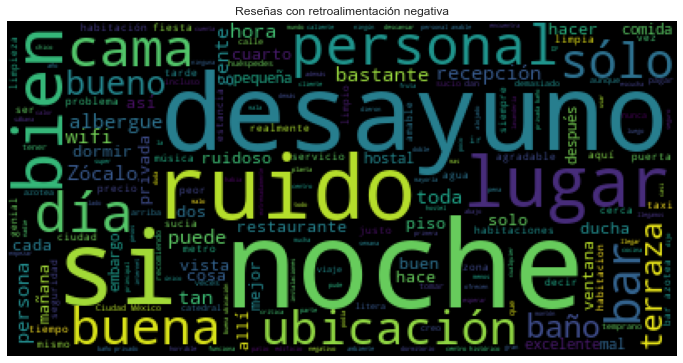

In [41]:
# Las palabras más usadas en la retroalimentación negativa
plt.figure(figsize = (12,12))
plt.imshow(wordcloud2)
plt.title("Reseñas con retroalimentación negativa")
plt.grid(False)
plt.axis(False)
plt.show()

In [42]:
# Guardamos la información pre procesada
BW_df.to_csv("MJ_preprocesado_trip.csv")

In [43]:
# Vemos el dataset original para ver las opiniones competas
original_df = pd.read_csv("./Opiniones_trip.csv", encoding = "utf8")

In [44]:
# Viendo opiniones con retroalimentación positiva con la palabra habitación
opiniones_buenas = []
# Viendo opiniones con retroalimentación negativa con la palabra habitación
opiniones_malas = []

# Buscamos todas las opiniones con la palabra habitación
opiniones = original_df.loc[original_df["opinion"].str.contains("si ")]

In [45]:
opiniones["opinion"][8]

'Este era mi primer día en DF. y yo disfrutamos de mi estancia en el hostal. No había problema servicial mi llegada aunque llegué a las 5 de la mañana. La ubicación es fantástica si quieres hacer mucho turismo. La estación de metro de Zócalo era justo a la vuelta de la esquina (y yo nos lo tomamos 4/5 días que yo estuve allí, una forma estupenda para hacer tu viaje incluso más económico) y naturalmente hay lugares de interés justo fuera de la puerta. Cuando leí las críticas para el albergue me di cuenta de que muchos de quejas sobre ruido del bar/restaurante, pero nunca fue un problema, que parece que cierran bastante pronto (al menos durante la semana). Me quitaron un poco de problemas para dormir por culpa del ruido del tráfico y la calle (mi habitación daba a la catedral) pero,…'

In [46]:
# Tranformemos la calificación a un número únicamente qie es el penúltimo de la cadena
for i, cali in enumerate(original_df['calificacion']):
    new_cal = cali[-2:-1]
    original_df['calificacion'][i] = int(new_cal)
    
original_df["calificacion"] = original_df["calificacion"].astype(int)

In [47]:
original_df[original_df["calificacion"] >= 4]["opinion"]

2      Es la tercera vez que me hospedo, las habitaci...
3      La ubicación es de lo mejor! A poca distancia ...
5      El hostal está situado en una gran ubicación, ...
6      Este hostal está situado en una fantástica ubi...
8      Este era mi primer día en DF. y yo disfrutamos...
                             ...                        
398    Lo mejor de este hostel es la ubicación, justo...
399    Estuve alojada la primer semana de Abril duran...
400    El mejor hostel en el cual me hospedé durante ...
401    Estuve el fin de semana pasado hospedada aquí ...
403    Mi novio y yo no estuvimos hospedados en el ho...
Name: opinion, Length: 268, dtype: object

In [48]:
original_df[original_df["calificacion"] < 4]["opinion"]

0      El hostal está detrás de la Catedral y tiene 2...
1      El hotel huele horrible a caño, los baños suci...
4      El lugar queda en una muy buena ubicación, al ...
7      Mundo joven Catedral está excelentemente ubica...
12     Lo unico bueno: la ubicacion, pero hay mas hos...
                             ...                        
378    Paré sólo x una noche. Para empezar: desde el ...
381    El bueffet corresponde al precio, osea malón, ...
382    No lo recomiendo si vas en parejas. Las habita...
394    Nos hemos alojado tres noches en dicho hostel,...
402    El hostel es bastante gradable, las habitacion...
Name: opinion, Length: 136, dtype: object

In [49]:
# Opiniones buenas
print(original_df["opinion"][2], end = "\n\n")
print(original_df["opinion"][3], end = "\n\n")
print(original_df["opinion"][5], end = "\n\n")

Es la tercera vez que me hospedo, las habitaciones son cómodas y amplias y los baños también. El desayuno tiene cereales, panes, jamón, queso, huevos. La cocina es cómoda, tiene elementos para cocinar y si no, hay un restobar al ingreso con buenos precios y opciones. La terraza es preciosa, un buen lugar para reunirse con otros huéspedes y además hay un bar para la tardecita/noche que pasa buena música. La ubicación es ideal para moverse a pie por el zócalo y los lugares del centro histórico, tenés el metro a una cuadra y en la puerta la parada del bus turístico. Hay además en la recepción, una agencia de turismo que ofrece muy buenas opciones para recorrer DF o lugares cercanos. Tantos los chicos de la recepción, del desayuno y de la agencia son muy amables y dispuestos a,…

La ubicación es de lo mejor! A poca distancia de la estación del metro y de la calle Madero y sus tiendas y negocios. El que tenga ascensor es un plus que se agradece sobre todo cuando estás tan cansado y con much

In [50]:
# Opiniones malas
print(original_df["opinion"][7], end = "\n\n")
print(original_df["opinion"][1], end = "\n\n")
print(original_df["opinion"][12], end = "\n\n")

Mundo joven Catedral está excelentemente ubicado justo detrás de la Catedral Metropolitana masiva y, por consiguiente, a sólo una manzana de la ciudad desde el Zócalo, el Templo Mayor, el Palacio Nacional y más. Esto también puede ser la primera inconveniente del hostal, porque es el piso más bullicioso albergue en el que me he alojado. No sólo por el ruido de la calle (tráfico, música, las alarmas de los coches, y la calle construcción justo enfrente hasta la medianoche), pero también por el ruido dentro del hostal. El patio interior embudos cada sonido de recepción y el restaurante del vestíbulo a través de todos los suelos del hostal, rebotando sobre pasos y antiguos muros de piedra en el camino. Mi pareja y yo estuvimos en la suite privada en la 5ª planta, aunque lo,…

El hotel huele horrible a caño, los baños sucios y apestan, no los lavan bien, MUCHO ruido!! Porque el bar del hotel está arriba y todos se escucha en todos los pisos, además de que los huéspedes hacen fiesta en sus 